# 0. Imports

In [23]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

# 1. Exploratory data analysis

## 1.1 Data collection and overview

In [6]:
data = pd.read_csv('../data/household_power_consumption.txt', sep=';', na_values='?')
data.shape

(2075259, 9)

In [7]:
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


## 1.2. Handle datetime format

In [12]:
data['datetime'] = pd.to_datetime(data.Date + ' ' + data.Time)
data.drop(columns=['Date', 'Time'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 10 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   object        
 1   Time                   object        
 2   Global_active_power    float64       
 3   Global_reactive_power  float64       
 4   Voltage                float64       
 5   Global_intensity       float64       
 6   Sub_metering_1         float64       
 7   Sub_metering_2         float64       
 8   Sub_metering_3         float64       
 9   datetime               datetime64[ns]
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 158.3+ MB


In [15]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,datetime
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00


## 1.3. Null values analysis

In [16]:
data.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
datetime                     0
dtype: int64

In [19]:
nan_data = data[data.Global_active_power.isnull()]

<AxesSubplot: >

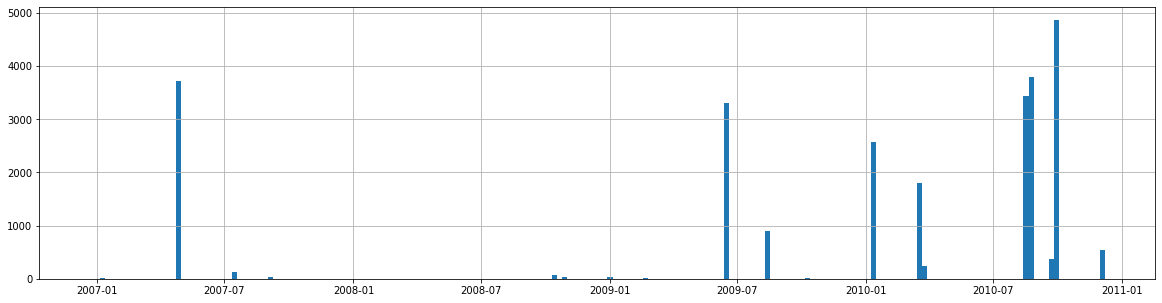

In [33]:
nan_data.datetime.hist(bins=200, figsize=(20,5))

> 25 779 rows have null values (apparently for every columns).  
> Year 2008 seems almost clean of nan values, let's take it as a subset for analysis.

In [64]:
subdata = data[data.datetime.dt.year==2008].copy()
subdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 527040 entries, 547596 to 1074635
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Global_active_power    526905 non-null  float64       
 1   Global_reactive_power  526905 non-null  float64       
 2   Voltage                526905 non-null  float64       
 3   Global_intensity       526905 non-null  float64       
 4   Sub_metering_1         526905 non-null  float64       
 5   Sub_metering_2         526905 non-null  float64       
 6   Sub_metering_3         526905 non-null  float64       
 7   datetime               527040 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(7)
memory usage: 36.2 MB


In [29]:
# Number of minutes in a year (366 days in 2008)
366 * 24 * 60

527040

Why a difference?

In [26]:
nan_subdata = subdata[subdata.Global_active_power.isnull()]
nan_subdata

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,datetime
566016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-13 19:00:00
594663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-02-02 16:27:00
624535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-02-23 10:19:00
624536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-02-23 10:20:00
667918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-03-24 13:22:00
...,...,...,...,...,...,...,...,...
1043670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-10-12 11:54:00
1043671,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-10-12 11:55:00
1043672,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-10-12 11:56:00
1043673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-10-12 11:57:00


Technics to handle nan values in electricity load curves:  
  - if short period (< 10 min): extrapolation (average of previous and following values)
  - else ~ hours or a day: copy-paste D-7 period (values of the past week at the same time)
  - possibility to go back further in past if necessary

Other more sophisticated technics: https://towardsdatascience.com/4-techniques-to-handle-missing-values-in-time-series-data-c3568589b5a8

NB: for V0: just copy-paste previous non-null value with 'ffill'.

In [65]:
subdata.fillna(value=None, method='ffill', axis=0, inplace=True, limit=70) # limit=70 --> if there is a gap > 70 min, it won't be filled
subdata.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
datetime                 0
dtype: int64

## 1.4. Verifying that Sub_metering_1/2/3 format is integer

In [66]:
# Check only for non-null values
labels = ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
for l in labels:
    print(l, subdata[~subdata[l].isnull()][l].apply(float.is_integer).all())

Sub_metering_1 True
Sub_metering_2 True
Sub_metering_3 True


In [67]:
# Sub_metering_1/2/3 are integer --> we can convert the column to integer format
subdata[labels].astype(int)
subdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 527040 entries, 547596 to 1074635
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Global_active_power    527040 non-null  float64       
 1   Global_reactive_power  527040 non-null  float64       
 2   Voltage                527040 non-null  float64       
 3   Global_intensity       527040 non-null  float64       
 4   Sub_metering_1         527040 non-null  float64       
 5   Sub_metering_2         527040 non-null  float64       
 6   Sub_metering_3         527040 non-null  float64       
 7   datetime               527040 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(7)
memory usage: 36.2 MB


## 1.5. Creating 'global_consumption'

In [76]:
labels = ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
subdata['global_consumption'] = subdata[labels].sum(axis=1)
subdata.loc[548275:548280,:]

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,datetime,global_consumption
548275,3.144,0.000,240.12,13.8,1.0,15.0,18.0,2008-01-01 11:19:00,34.0
548276,4.034,0.000,239.69,17.2,1.0,32.0,18.0,2008-01-01 11:20:00,51.0
548277,4.402,0.054,238.82,18.4,2.0,38.0,17.0,2008-01-01 11:21:00,57.0
548278,4.396,0.054,238.85,18.4,1.0,39.0,18.0,2008-01-01 11:22:00,58.0
548279,4.450,0.048,239.85,18.4,1.0,38.0,17.0,2008-01-01 11:23:00,56.0
548280,4.418,0.050,239.23,18.4,1.0,39.0,18.0,2008-01-01 11:24:00,58.0


## 1.6. Data visualization

<AxesSubplot: xlabel='datetime'>

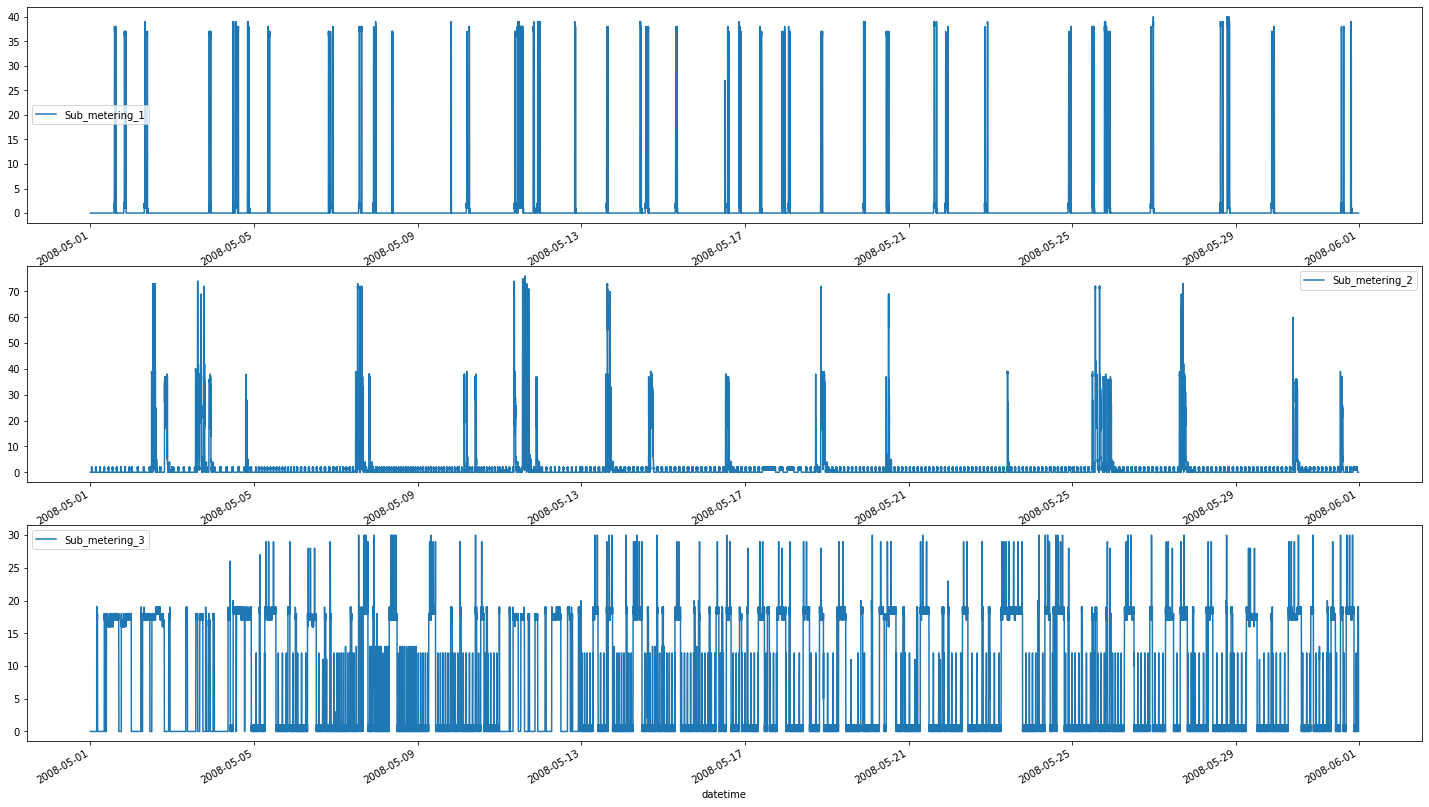

In [87]:
selected_data = subdata[subdata.datetime.dt.month==5]

f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(25,15))
selected_data.plot("datetime", "Sub_metering_1", ax=ax1)
selected_data.plot("datetime", "Sub_metering_2", ax=ax2)
selected_data.plot("datetime", "Sub_metering_3", ax=ax3)

/tmp/ipykernel_23298/88178729.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  selected_data = subdata[subdata.datetime.dt.week==20]


<AxesSubplot: xlabel='datetime'>

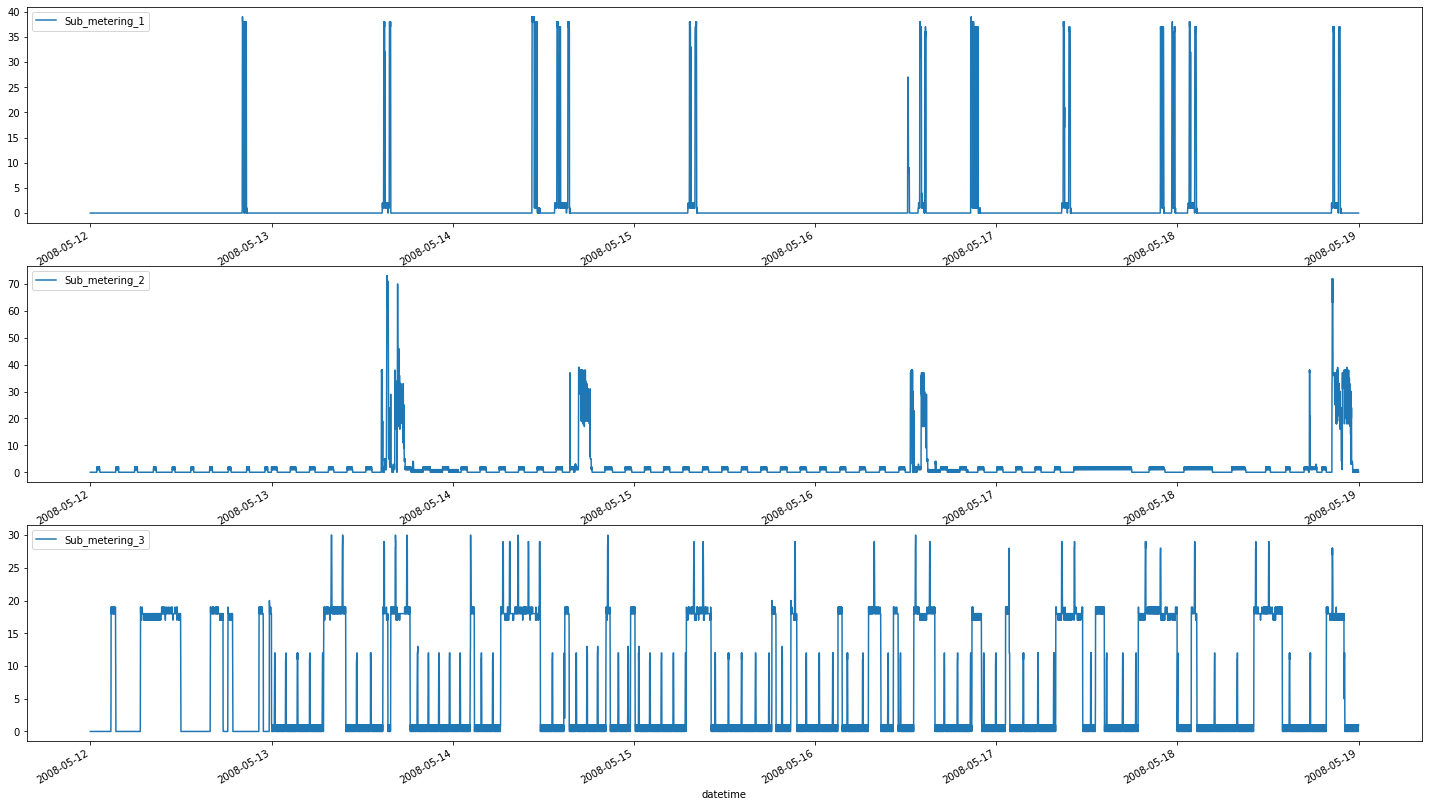

In [88]:
selected_data = subdata[subdata.datetime.dt.week==20]

f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(25,15))
selected_data.plot("datetime", "Sub_metering_1", ax=ax1)
selected_data.plot("datetime", "Sub_metering_2", ax=ax2)
selected_data.plot("datetime", "Sub_metering_3", ax=ax3)

<AxesSubplot: xlabel='datetime'>

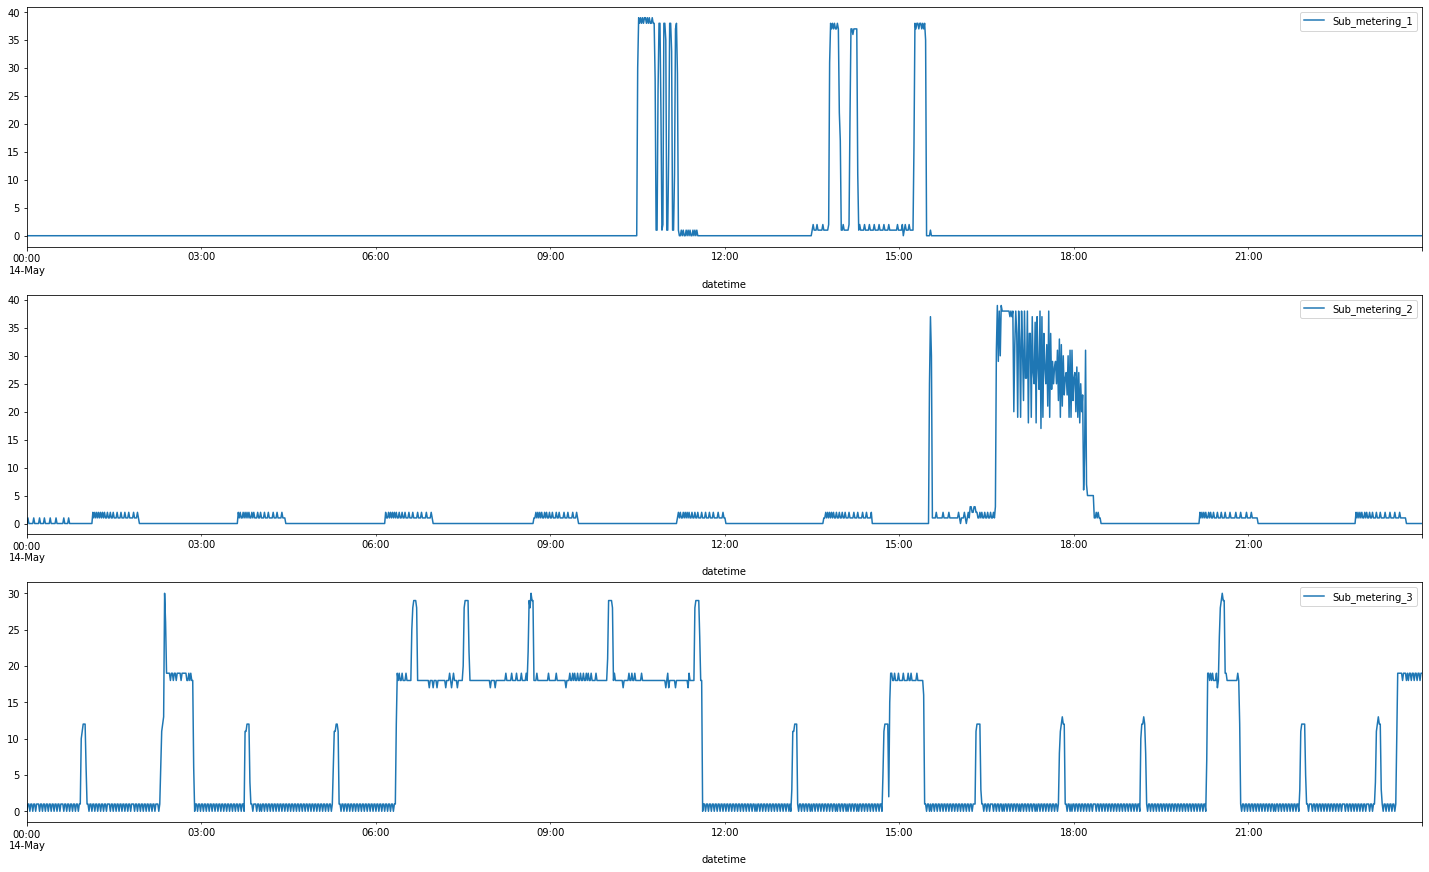

In [89]:
selected_data = subdata[(subdata.datetime.dt.month==5) & (subdata.datetime.dt.day==14)]

f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(25,15))
selected_data.plot("datetime", "Sub_metering_1", ax=ax1)
selected_data.plot("datetime", "Sub_metering_2", ax=ax2)
selected_data.plot("datetime", "Sub_metering_3", ax=ax3)

<AxesSubplot: xlabel='datetime'>

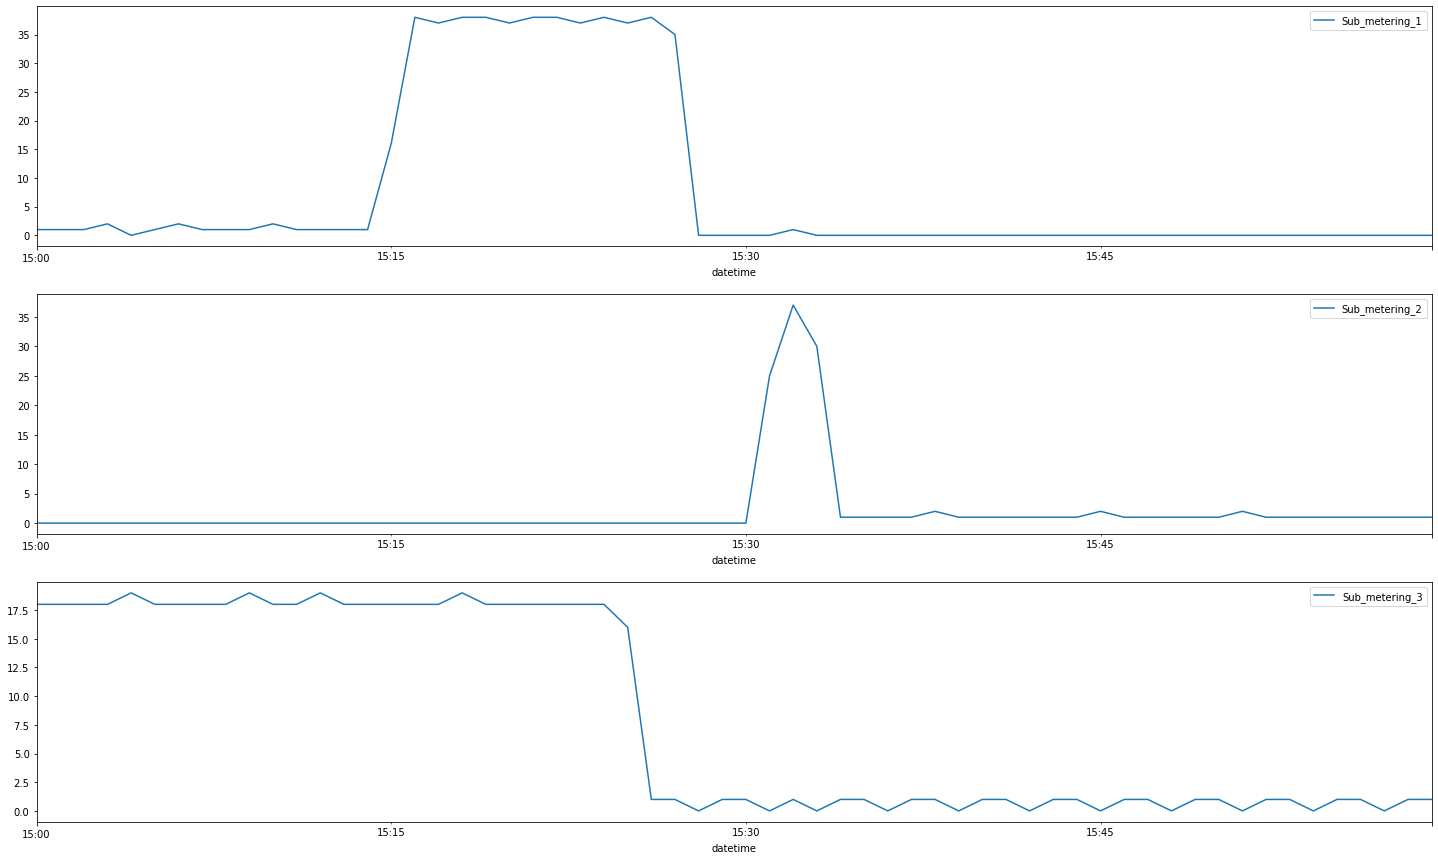

In [90]:
selected_data = subdata[(subdata.datetime.dt.month==5) & (subdata.datetime.dt.day==14) & (subdata.datetime.dt.hour==15)]

f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(25,15))
selected_data.plot("datetime", "Sub_metering_1", ax=ax1)
selected_data.plot("datetime", "Sub_metering_2", ax=ax2)
selected_data.plot("datetime", "Sub_metering_3", ax=ax3)

# 2. Preprocessing

## 2.1. Creating X and y

In [135]:
features = ['datetime', 'global_consumption', 'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']
num_features = ['global_consumption', 'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']
labels = ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

X = subdata[features]
y = subdata[labels]
X.shape, y.shape

((527040, 6), (527040, 3))

## 2.2. Scaling

In [136]:
# Train/test Split /!\ For later, if we use sequential models (ARIMA, RNN): see if we consider a TS special train/test split (to keep sequence's logic)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Index bothers when concatenate with datetime in next cell
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((368928, 6), (158112, 6), (368928, 3), (158112, 3))

In [137]:
# Standard scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train[num_features])
X_train_scaled = pd.DataFrame(scaler.transform(X_train[num_features]), columns=num_features)
X_test_scaled = pd.DataFrame(scaler.transform(X_test[num_features]), columns=num_features)

X_train_scaled['datetime'] = X_train.datetime
X_test_scaled['datetime'] = X_train.datetime

X_train_scaled.head()

,global_consumption,Global_active_power,Global_reactive_power,Voltage,Global_intensity,datetime
0,6.644063,5.342285,3.249878,-1.679722,5.365645,2008-12-04 18:11:00
1,-0.580206,-0.833210,0.283732,-0.397588,-0.791352,2008-08-30 01:37:00
2,-0.658730,0.275261,-1.071174,0.341032,0.279430,2008-04-14 20:44:00
3,-0.580206,-0.489396,-0.174007,-0.115379,-0.479041,2008-07-10 16:45:00
4,0.676189,2.101419,-1.071174,-0.491658,2.108683,2008-12-15 07:57:00


## 2.3. Visualization of features

<AxesSubplot: xlabel='datetime'>

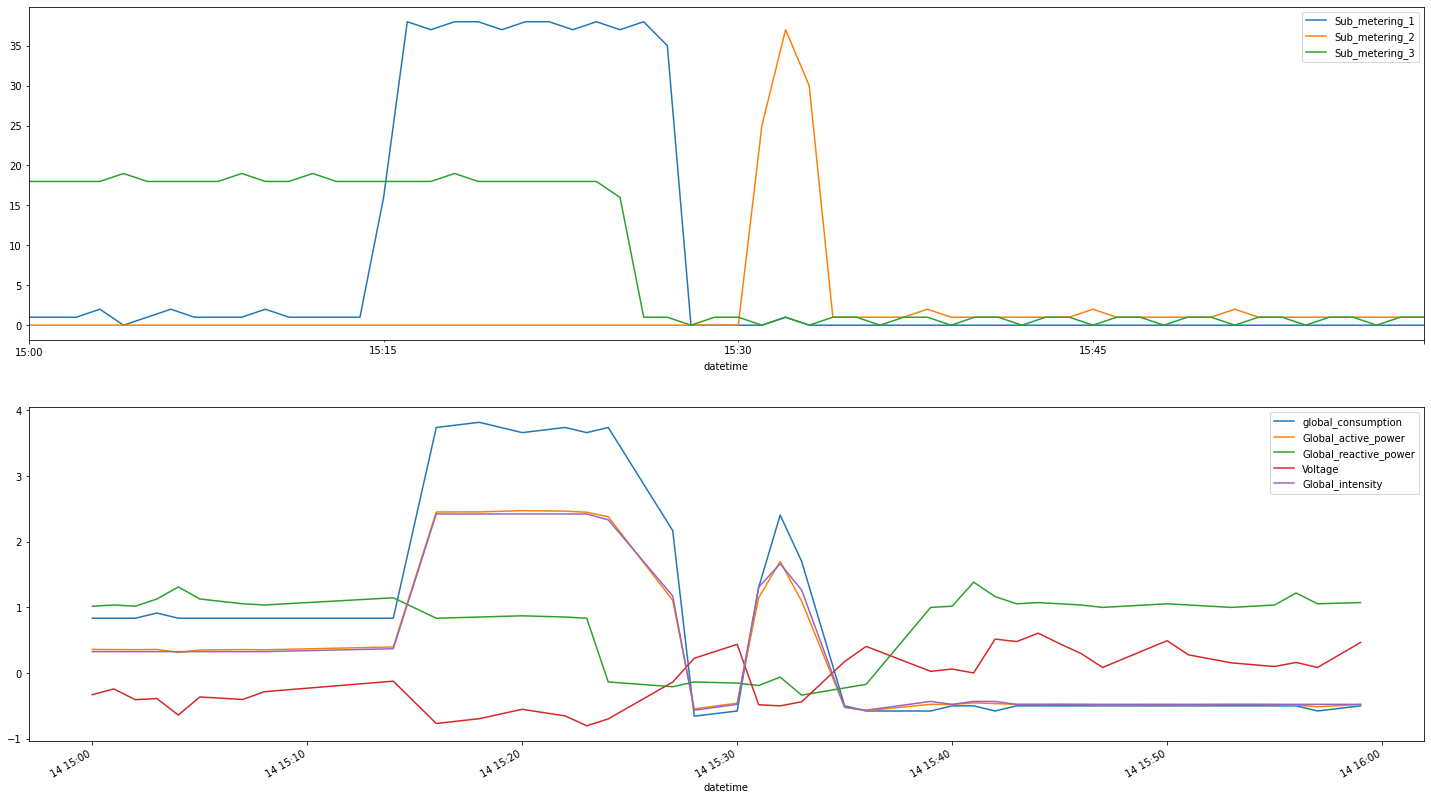

In [138]:
selection = (X_train.datetime.dt.month==5) & (X_train.datetime.dt.day==14) & (X_train.datetime.dt.hour==15)
selected_y = y_train[selection]
selected_X = X_train_scaled[selection]

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(25,15))

selected_data.plot("datetime", "Sub_metering_1", ax=ax1)
selected_data.plot("datetime", "Sub_metering_2", ax=ax1)
selected_data.plot("datetime", "Sub_metering_3", ax=ax1)

selected_X.plot("datetime", "global_consumption", ax=ax2)
selected_X.plot("datetime", "Global_active_power", ax=ax2)
selected_X.plot("datetime", "Global_reactive_power", ax=ax2)
selected_X.plot("datetime", "Voltage", ax=ax2)
selected_X.plot("datetime", "Global_intensity", ax=ax2)

# 3. Modeling

To try:  
- LinearRegression()  
- Decision Tree